<a href="https://colab.research.google.com/github/deepakk7195/IISC_CDS_DS/blob/Business_Analytics/M5_NB_MiniProject_1_Market_Basket_Analysis_Stan_Ver_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project 1: Market Basket analysis

## Learning Objectives

At the end of the experiment, you will be able to:

* extract summary level insight from a given dataset

* Integrate the data and identify the underlying pattern or structure

* understand the fundamentals of market basket analysis

* construct "rules" that provide concrete recommendations for businesses

## Dataset

The dataset chosen for this mini project is **Instacart Dataset**. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, there are orders between 4 and 100, with the sequence of products purchased in each order. The dataset also includes the products in each order, the time of day and day of week of each order, the name and aisle/department of each product, which are stored across various files.

## Problem Statement


Extract association rules and find groups of frequently purchased items from a large-scale grocery orders dataset.

## Grading = 10 Points

#### Import required packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## **Stage 1**: Data Wrangling

We have five different files:

    - orders.csv
    - order_products__train.csv
    - products.csv
    - aisles.csv
    - departments.csv

These files contain the neccesary data to solve the problem. Load all the files correctly, after observing the header level details, data records etc

**Hint:** Use `read_csv` from pandas

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/Instacart.zip
!unzip -qq Instacart.zip

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Load the data

Load all the given datasets

In [ ]:
# YOUR CODE HERE
dfOrders = pd.read_csv('./Instacart/orders.csv')
dfOrderProducts = pd.read_csv('./Instacart/order_products__train.csv')
dfProducts = pd.read_csv('./Instacart/products.csv')
dfAisles = pd.read_csv('./Instacart/aisles.csv')
dfDepartments = pd.read_csv('./Instacart/departments.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfOrders.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
dfOrders.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [ ]:
dfOrderProducts.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
dfOrderProducts.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [ ]:
dfProducts.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
dfProducts.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

In [ ]:
print(f"Number of rows in Orders: {len(dfOrders)}")
print(f"Number of rows in Order Products: {len(dfOrderProducts)}")
print(f"Number of rows in Products: {len(dfProducts)}")
print(f"Number of rows in Aisles: {len(dfAisles)}")
print(f"Number of rows in Departments: {len(dfDepartments)}")

Number of rows in Orders: 3421083
Number of rows in Order Products: 1384617
Number of rows in Products: 49688
Number of rows in Aisles: 134
Number of rows in Departments: 21


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfAisles.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
dfAisles.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


aisle_id     int64
aisle       object
dtype: object

In [ ]:
dfDepartments.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
dfDepartments.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


department_id     int64
department       object
dtype: object

In [ ]:
print(len(dfOrders))
print(len(dfOrderProducts))
print(len(dfProducts))
print(len(dfAisles))
print(len(dfDepartments))

3421083
1384617
49688
134
21


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Count duplicate rows
duplicate_count = dfOrders.duplicated().sum()
print(f"Number of duplicate rows in Orders: {duplicate_count}")

duplicate_count = dfOrderProducts.duplicated().sum()
print(f"Number of duplicate rows in Order Products: {duplicate_count}")

duplicate_count = dfProducts.duplicated().sum()
print(f"Number of duplicate rows in Products: {duplicate_count}")

duplicate_count = dfAisles.duplicated().sum()
print(f"Number of duplicate rows in Aisles: {duplicate_count}")

duplicate_count = dfDepartments.duplicated().sum()
print(f"Number of duplicate rows in Departments: {duplicate_count}")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of duplicate rows in Orders: 0
Number of duplicate rows in Order Products: 0
Number of duplicate rows in Products: 0
Number of duplicate rows in Aisles: 0
Number of duplicate rows in Departments: 0


In [ ]:
print('\nUpdating datatypes...Please Wait...')
#for the Aisle dataframe
dfAisles['aisle'] = dfAisles['aisle'].astype('string')

dfDepartments['department'] = dfDepartments['department'].astype('string')

#for the orders dataframe.
dfOrders['days_since_prior_order'] = dfOrders['days_since_prior_order'].replace(np.nan, -1)
dfOrders['days_since_prior_order'] = dfOrders['days_since_prior_order'].astype('int64')

#for the products dataframe.
dfProducts['product_name'] = dfProducts['product_name'].astype('string')

print('Datatypes successfully updated.')


Updating datatypes...Please Wait...
Datatypes successfully updated.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Data Integration (1 point)

As the required data is present in different files, we need to integrate all the five to make single dataframe/dataset. For that purpose, use the unique identifier provided in all the dataframes so that it can be used to map the data in different files correctly.

**Example:** `product_id` is available in both `products` dataframe and `order_products__train` dataframe, we can merge these two into a single dataframe based on `product_id`

**Hint:** [pd.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [ ]:
# YOUR CODE HERE
# dfOrders.rename(columns={'order_id': 'order_id_orders'}, inplace=True)
# dfOrderProducts.rename(columns={'order_id': 'order_id_order_products'}, inplace=True)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfOrderProductDetails = pd.merge(dfOrderProducts, dfProducts, on='product_id', how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(dfOrderProductDetails)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1384617

In [ ]:
dfOrderProductDetails.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,Organic Celery Hearts,83,4
3,1,49683,4,0,Cucumber Kirby,83,4
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15


In [ ]:
dfOrderProductAisleDetails = pd.merge(dfOrderProductDetails, dfAisles, on='aisle_id', how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfOrderProductAisleDetails.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood


In [ ]:
len(dfOrderProductAisleDetails)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1384617

In [ ]:
dfOrderProductAisleDeptDetails = pd.merge(dfOrderProductAisleDetails, dfDepartments, on='department_id', how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfOrderProductAisleDeptDetails.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods


In [ ]:
len(dfOrderProductAisleDeptDetails)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1384617

In [ ]:
dfOrderDetailsProductAisleDeptDetails = pd.merge(dfOrderProductAisleDeptDetails, dfOrders, on='order_id', how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(dfOrderDetailsProductAisleDeptDetails)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1384617

### Understanding relationships and new insights from the data (3 points)

1.  How many times was each product ordered?

    **Hint:** group orders by product
    

2.  Find the number of orders per department and visualize using an appropriate plot


3.  On which day of the week do customers tend to buy more groceries? Which are the peak hours
of shopping?

  * Find the frequency of orders on week days using an appropriate plot
  * Find the frequency of orders during hours of the day using an appropriate plot?
  

4. Find the ratio of Re-ordered and Not Re-ordered products and visualize it

5. Plot the heatmap of Re-order ratio of the Day of week vs Hour of day

1. How many times was each product ordered?

Hint: group orders by product

In [ ]:
dfOrderDetailsProductAisleDeptDetails.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9


In [ ]:
len(dfOrderDetailsProductAisleDeptDetails)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1384617

In [ ]:
dfOrderDetailsProductAisleDeptDetails.groupby('order_id').size()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_id
1           8
36          8
38          9
96          7
98         49
           ..
3421049     6
3421056     5
3421058     8
3421063     4
3421070     3
Length: 131209, dtype: int64

In [ ]:
dfOrderDetailsProductAisleDeptDetails.groupby('product_id').size()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_id
1          76
2           4
3           6
4          22
5           1
         ... 
49682       5
49683    2413
49686       7
49687       1
49688       4
Length: 39123, dtype: int64

2. Find the number of orders per department and visualize using an appropriate plot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-34-26ba1cce98b0>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(unique_orders))


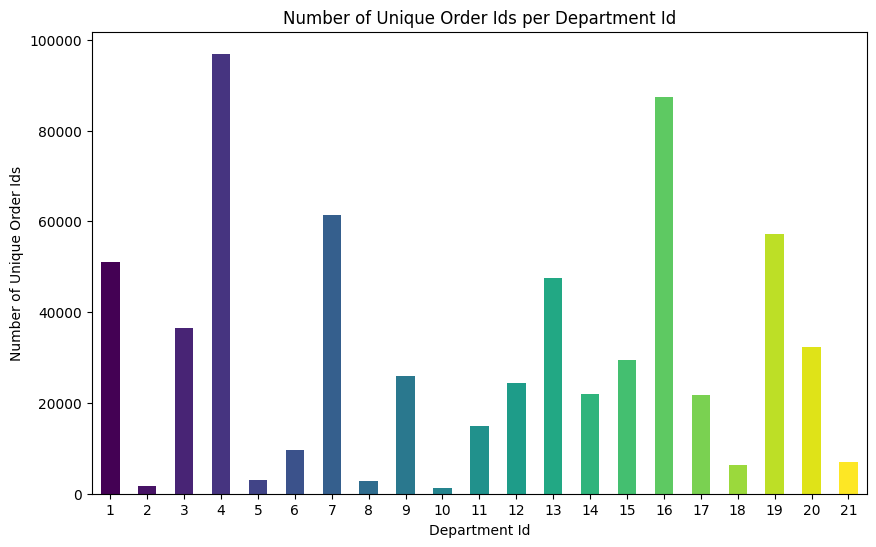

In [ ]:
# Group by Department Id and count unique Order Ids
unique_orders = dfOrderDetailsProductAisleDeptDetails.groupby('department_id')['order_id'].nunique()

# Plotting
plt.figure(figsize=(10, 6))
colormap = plt.cm.get_cmap('viridis', len(unique_orders))
unique_orders.plot(kind='bar', color=[colormap(i) for i in range(len(unique_orders))])
plt.title('Number of Unique Order Ids per Department Id')
plt.xlabel('Department Id')
plt.ylabel('Number of Unique Order Ids')
plt.xticks(rotation=0)
plt.show()

3. On which day of the week do customers tend to buy more groceries? Which are the peak hours of shopping?

Find the frequency of orders on week days using an appropriate plot
Find the frequency of orders during hours of the day using an appropriate plot?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-35-38bdb71ab7f1>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(ordersByDay))


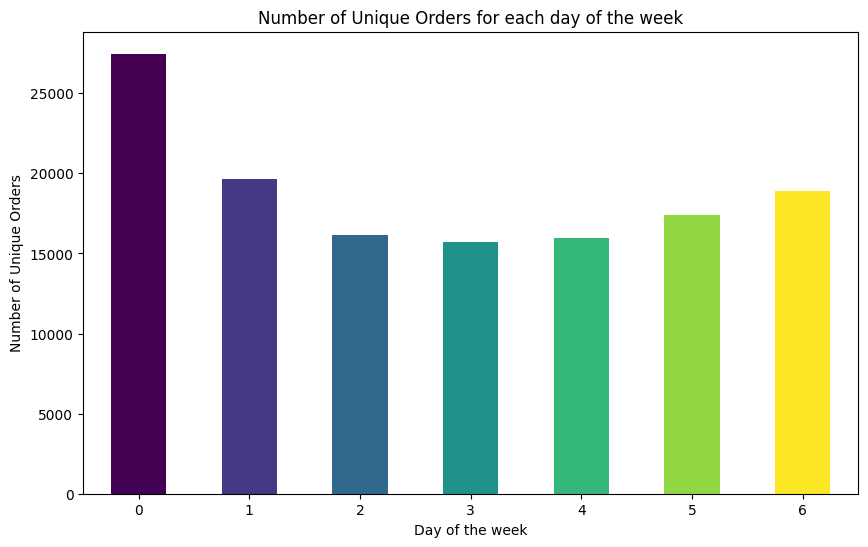

In [ ]:
# Group by Day of the week and count unique Order Ids
ordersByDay = dfOrderDetailsProductAisleDeptDetails.groupby('order_dow')['order_id'].nunique()

# Plotting
plt.figure(figsize=(10, 6))
colormap = plt.cm.get_cmap('viridis', len(ordersByDay))
ordersByDay.plot(kind='bar', color=[colormap(i) for i in range(len(ordersByDay))])
plt.title('Number of Unique Orders for each day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of Unique Orders')
plt.xticks(rotation=0)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-36-8369c49ed609>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('twilight', len(ordersByHour))


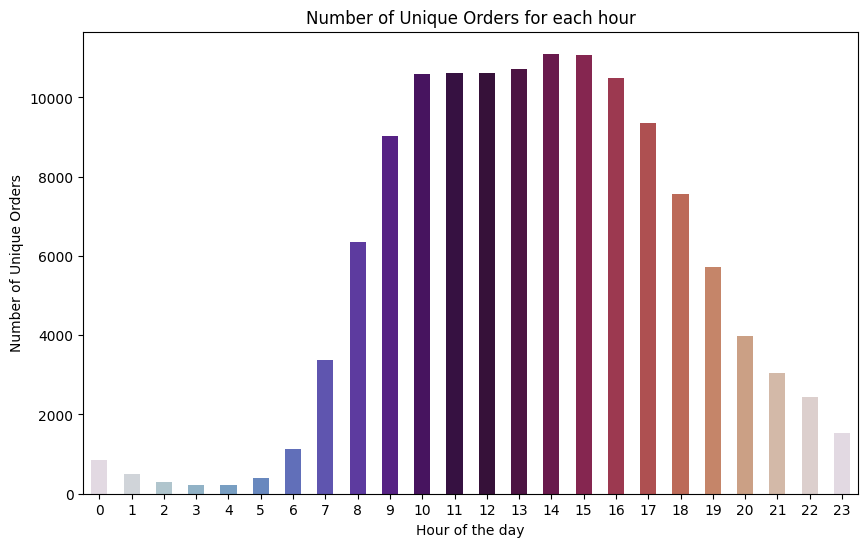

In [ ]:
# Group by Hour of the Day and count unique Order Ids
ordersByHour = dfOrderDetailsProductAisleDeptDetails.groupby('order_hour_of_day')['order_id'].nunique()

# Plotting
plt.figure(figsize=(10, 6))
colormap = plt.cm.get_cmap('twilight', len(ordersByHour))
ordersByHour.plot(kind='bar', color=[colormap(i) for i in range(len(ordersByHour))])
plt.title('Number of Unique Orders for each hour')
plt.xlabel('Hour of the day')
plt.ylabel('Number of Unique Orders')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# YOUR CODE HERE

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4. Find the ratio of Re-ordered and Not Re-ordered products and visualize it

In [ ]:
# Filter dataframe to include only rows where reordered is 0
filtered_df = dfOrderDetailsProductAisleDeptDetails[ dfOrderDetailsProductAisleDeptDetails['reordered'] > 0]

# Get the unique product IDs of reordered products
reordered_product_ids = filtered_df['product_id'].unique()

# Count the number of unique product IDs
count_reordered_product_ids = len(reordered_product_ids)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(count_reordered_product_ids)

30176


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(len(dfOrderDetailsProductAisleDeptDetails['product_id'].unique()))

39123


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
count_not_reordered_product_ids = len(dfOrderDetailsProductAisleDeptDetails['product_id'].unique()) - count_reordered_product_ids

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(count_not_reordered_product_ids)

8947


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Draw a pie chart to visualize the ratio of Re-ordered and Not Re-ordered products

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
counts = [count_not_reordered_product_ids, count_reordered_product_ids]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


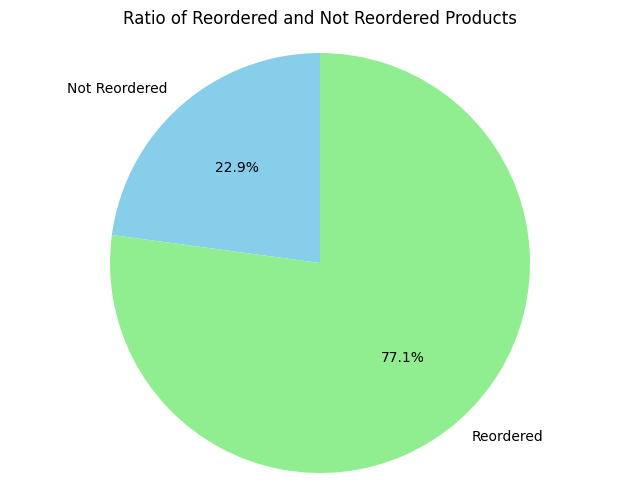

In [ ]:
# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=['Not Reordered', 'Reordered'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Ratio of Reordered and Not Reordered Products')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Plot the heatmap of Re-order ratio of the Day of week vs Hour of day

In [ ]:
# Count the total number of rows and the number of rows with reordered items
total_counts = dfOrderDetailsProductAisleDeptDetails.groupby(['order_dow', 'order_hour_of_day']).size().reset_index(name='total_count')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
total_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_dow,order_hour_of_day,total_count
0,0,0,1568
1,0,1,1124
2,0,2,841
3,0,3,524
4,0,4,367
...,...,...,...
163,6,19,9272
164,6,20,5883
165,6,21,5414
166,6,22,4239


In [ ]:
filtered_df = dfOrderDetailsProductAisleDeptDetails[ dfOrderDetailsProductAisleDeptDetails['reordered'] > 0]
reordered_counts = filtered_df.groupby(['order_dow', 'order_hour_of_day']).size().reset_index(name='reorder_count')
reordered_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_dow,order_hour_of_day,reorder_count
0,0,0,906
1,0,1,660
2,0,2,499
3,0,3,290
4,0,4,220
...,...,...,...
163,6,19,5351
164,6,20,3554
165,6,21,3346
166,6,22,2727


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


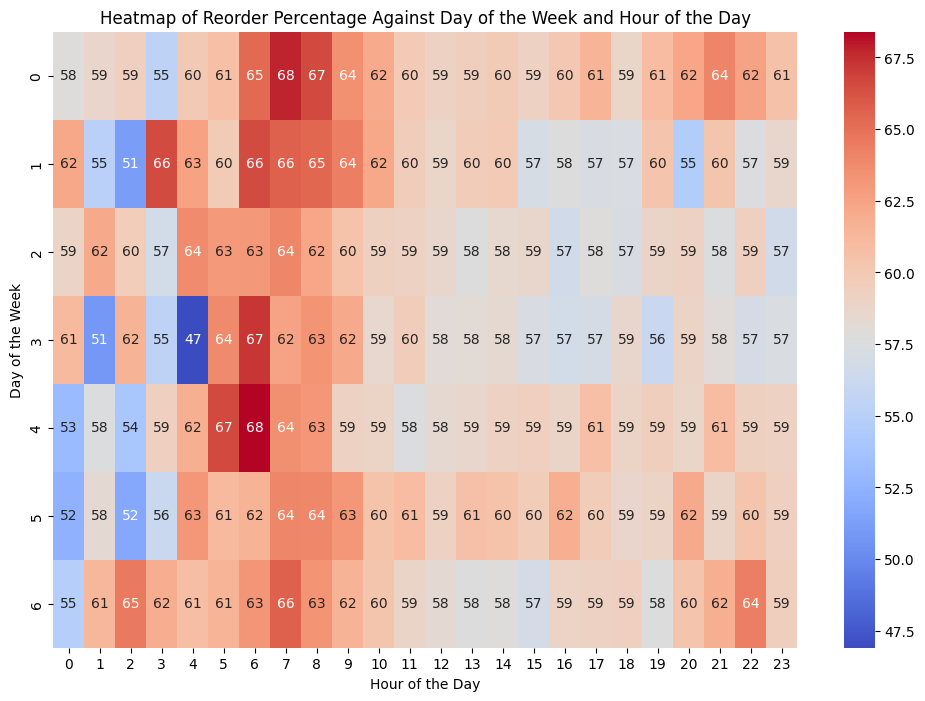

In [ ]:
# Merge the counts
merged_counts = pd.merge(total_counts, reordered_counts, on=['order_dow', 'order_hour_of_day'])

# Calculate reorder percentage
merged_counts['reorder_percentage'] = merged_counts['reorder_count'] / merged_counts['total_count'] * 100

# Pivot the table
heatmap_data = merged_counts.pivot(index='order_dow', columns='order_hour_of_day', values='reorder_percentage')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('Heatmap of Reorder Percentage Against Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


In [ ]:
merged_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_dow,order_hour_of_day,total_count,reorder_count,reorder_percentage
0,0,0,1568,906,57.780612
1,0,1,1124,660,58.718861
2,0,2,841,499,59.334126
3,0,3,524,290,55.343511
4,0,4,367,220,59.945504
...,...,...,...,...,...
163,6,19,9272,5351,57.711389
164,6,20,5883,3554,60.411355
165,6,21,5414,3346,61.802734
166,6,22,4239,2727,64.331210


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Stage 2:** Create a basket (4 points)

As the dataset contains huge amount of data, let us take a subset of the data to extract the association rules from it.

**Assumption:** Segment the data by considering the 100 most frequent ordered items. Please note it is just an assumption. You can consider 'n' frequent order items as per your choice.

**Hint:**

- Drop the unwanted columns

- Find the frequencies of orders based on the products and  consider the 100 most frequent order items.

    **Hint:** Count the frequencies of orders for each product_id using `groupby()` and `count()` respectively

- Extract the records of 100 most frequent items (which are extracted in previous step) from combined dataframe.

- Create a Pivot table with `order_id` as index and `product_name` as columns and `reorder` as values.

    - set the `order_id` as index using set_index()
    - fill all the nan values with 0

- After performing the above step, there are a lot of zeros in the data, make sure that any positive values are converted to a 1 and anything less than 0 is set to 0.


In [ ]:
# YOUR CODE HERE
dfOrderDetailsProductAisleDeptDetails.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9


In [ ]:
product_freq = dfOrderDetailsProductAisleDeptDetails.groupby('product_id').size().reset_index(name='product_order_frequency')
product_freq


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,product_order_frequency
0,1,76
1,2,4
2,3,6
3,4,22
4,5,1
...,...,...
39118,49682,5
39119,49683,2413
39120,49686,7
39121,49687,1


In [ ]:
# Sort the dataframe by product_freq in descending order
product_freq_sorted_df = product_freq.sort_values(by='product_order_frequency', ascending=False)

# Select the top 100 rows
top_100_freq = product_freq_sorted_df.head(100)

# Extract the product_id column
top_100_freq_product_ids = top_100_freq['product_id'].tolist()

print(top_100_freq_product_ids)

[24852, 13176, 21137, 21903, 47626, 47766, 47209, 16797, 26209, 27966, 39275, 27845, 30391, 45007, 22935, 24964, 4920, 46979, 40706, 8518, 4605, 42265, 45066, 31717, 5876, 44632, 43352, 28204, 5450, 8424, 21616, 24184, 19057, 30489, 26604, 37646, 27104, 49235, 28985, 44359, 48679, 41950, 21938, 17794, 43961, 27086, 49683, 34126, 10749, 39877, 37067, 9076, 5077, 12341, 8277, 34969, 19660, 35951, 24838, 25890, 31506, 46667, 22035, 8174, 35221, 29487, 34358, 28842, 20114, 11520, 22825, 39928, 15290, 33198, 27344, 18465, 27521, 16759, 33731, 9839, 38739, 27156, 23909, 5785, 46906, 196, 11777, 28199, 33000, 44142, 47144, 40604, 5025, 42736, 21709, 8193, 9387, 37687, 20995, 6184]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
top_100_freq_product_orders = dfOrderDetailsProductAisleDeptDetails[dfOrderDetailsProductAisleDeptDetails['product_id'].isin(top_100_freq_product_ids)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
top_100_freq_product_orders.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9
5,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce,112108,train,4,4,10,9
6,1,47209,7,0,Organic Hass Avocado,24,4,fresh fruits,produce,112108,train,4,4,10,9
7,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs,112108,train,4,4,10,9
9,36,19660,2,1,Spring Water,115,7,water seltzer sparkling water,beverages,79431,train,23,6,18,30


In [ ]:
basket_table = top_100_freq_product_orders.pivot_table(index='order_id', columns='product_name', values='reordered', fill_value=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_name,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Blueberries,Boneless Skinless Chicken Breasts,Broccoli Crown,Bunched Cilantro,...,Sparkling Lemon Water,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420996,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3420998,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3421056,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
type(basket_table)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pandas.core.frame.DataFrame

In [ ]:
# Apply a lambda function to convert positive values to 1, others to 0
basket_table_transformed = basket_table.applymap(lambda x: 1 if x > 0 else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket_table_transformed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_name,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Blueberries,Boneless Skinless Chicken Breasts,Broccoli Crown,Bunched Cilantro,...,Sparkling Lemon Water,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420996,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3420998,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3421056,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## **Stage 3:** Apply Apriori algorithm (2 points)

- As the dataset contains huge amount of data, let us take a subset of the data to extract the association rules from it.

  **Assumption:** Segment the basket by considering 100000 records. Please note its just an assumption, you can consider 'n'  records as per your choice.

  **Hint:** [apriori](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/)

- Find the association rules and make a dataframe

In [ ]:
# YOUR CODE HERE
freqItemSets = apriori(basket_table_transformed, min_support=0.0001, use_colnames=False, max_len=10000, verbose=0, low_memory=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
len(freqItemSets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


29541

In [ ]:
freqItemSets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.018602,(0)
1,0.013251,(1)
2,0.017243,(2)
3,0.026087,(3)
4,0.141870,(4)
...,...,...
29536,0.000127,"(65, 71, 76, 57, 62)"
29537,0.000106,"(65, 67, 71, 76, 57)"
29538,0.000106,"(4, 37, 71, 46, 55, 57)"
29539,0.000106,"(4, 37, 71, 46, 57, 62)"


In [ ]:
association_rules_df = association_rules(freqItemSets, metric='confidence', min_threshold=0.8, support_only=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
association_rules_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(13, 79)",(5),0.000180,0.175792,0.000149,0.823529,4.684672,0.000117,4.670510,0.786680
1,"(65, 2, 66)",(4),0.000127,0.141870,0.000106,0.833333,5.873934,0.000088,5.148782,0.829862
2,"(3, 46, 63)",(4),0.000127,0.141870,0.000117,0.916667,6.461327,0.000099,10.297563,0.845341
3,"(3, 21, 7)",(5),0.000149,0.175792,0.000127,0.857143,4.875883,0.000101,5.769454,0.795027
4,"(65, 10, 67)",(4),0.000117,0.141870,0.000106,0.909091,6.407928,0.000090,9.439433,0.844042
...,...,...,...,...,...,...,...,...,...,...
100,"(8, 26, 29, 5)",(34),0.000138,0.066104,0.000117,0.846154,12.800353,0.000108,6.070324,0.922004
101,"(41, 26, 29, 31)",(5),0.000117,0.175792,0.000117,1.000000,5.688531,0.000096,inf,0.824304
102,"(29, 50, 26, 5)",(34),0.000149,0.066104,0.000127,0.857143,12.966592,0.000118,6.537272,0.923016
103,"(34, 5, 66, 46)",(71),0.000127,0.091342,0.000117,0.916667,10.035598,0.000105,10.903902,0.900469
